# Analysis and Visualizations

Let's import all the necessary libraries first.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

Next, let's load and open the cleaned CSV file (called df_clean). 

In [2]:
with open('../data/Aviation_Data_Cleaned_v3.csv', encoding='utf8') as f:
    dtypes = {'Column6Name': 'str', 'Column7Name': 'str', 'Column28Name': 'str'}
    df_clean = pd.read_csv(f, dtype=dtypes, low_memory=False)

Let's start with finding a subset of the manufacturers that we can use to filter our visualizations.

In [3]:
df_clean['Manufacturer'].value_counts()

Boeing               938
Mcdonnell Douglas    291
Airbus               177
Beech                111
Embraer              110
Bombardier            96
Douglas               85
Lockheed              38
Cessna                32
Gulfstream            10
Learjet                9
Convair                8
Raytheon               3
Dassault               3
Hawker                 3
Name: Manufacturer, dtype: int64

We need a minimum number of observations to make a useful statisical observation. 100 seems like a good cutoff, and the conveniently leaves us with 5 manufacturers. Let's keep only these. 

In [4]:
top_5_list = df_clean['Manufacturer'].value_counts().head().index.tolist()

In [5]:
df_top_manufacturers = df_clean[df_clean['Manufacturer'].isin(top_5_list)]

In [6]:
top_5_percent = df_top_manufacturers['Manufacturer'].value_counts(normalize=True).head().values.tolist()

Let's look at the distribution of each manufacturer in the market given the data we have. 

In [7]:
# This is plotting using the dataframe
# (df_top_manufacturers['Manufacturer'].value_counts(normalize=True) * 100).plot(kind='bar', figsize=(8,8), 
#               title='Manufacturers Distribution in the Market', ylabel= "Percent Distribution", rot=0);

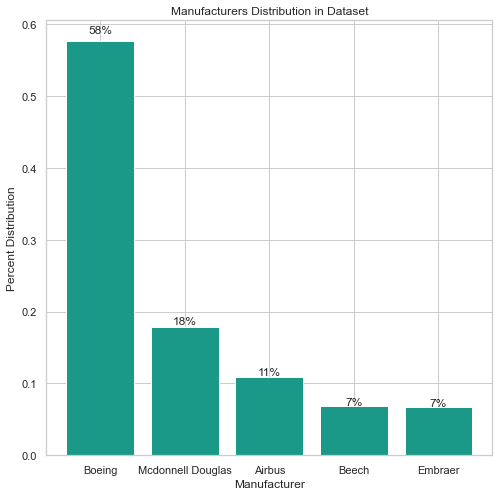

In [63]:
# Here's the same thing in matplotlib
fig, ax = plt.subplots(figsize=(8,8))
ax.bar(top_5_list, top_5_percent, color='#1a9988')
ax.set_xlabel('Manufacturer')
ax.set_ylabel('Percent Distribution')
ax.set_title('Manufacturers Distribution in Dataset')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center');

As expected with the data, Boeing makes up about 58% of the data. Let's look at total number of passengers per manufacturer and see if it lines up. 

In [9]:
# This is plotting using the dataframe
# x=df_top_manufacturers.groupby('Manufacturer')['Total.Passengers'].sum().sort_values().plot(kind='bar', 
#                                                                                figsize=(10,8), rot=70)

#plt.xlabel('Manufacturer')
#plt.ylabel('Total Passengers')
#plt.title('Total Passengers per Manufacturer')
#plt.show()

In [10]:
df_top_manufacturers.groupby('Manufacturer')['Total.Passengers'].sum().sort_values()

Manufacturer
Beech                  1909.0
Embraer                5676.0
Airbus                28521.0
Mcdonnell Douglas     39662.0
Boeing               135788.0
Name: Total.Passengers, dtype: float64

In [11]:
top_5_sorted = df_top_manufacturers.groupby('Manufacturer')['Total.Passengers'].sum().sort_values().index.tolist()
total_passengers = df_top_manufacturers.groupby('Manufacturer')['Total.Passengers'].sum().sort_values().values.tolist()

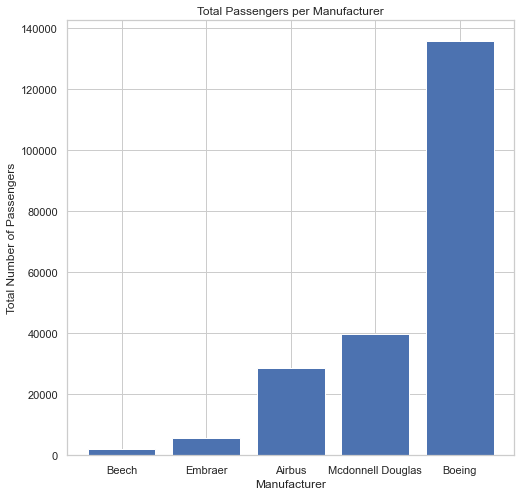

In [62]:
# Here's the same thing in matplotlib
fig, ax = plt.subplots(figsize=(8,8))
ax.bar(top_5_sorted, total_passengers)
ax.set_xlabel('Manufacturer')
ax.set_ylabel('Total Number of Passengers')
ax.set_title('Total Passengers per Manufacturer');

Let's look at the different injury levels per manufacturer.

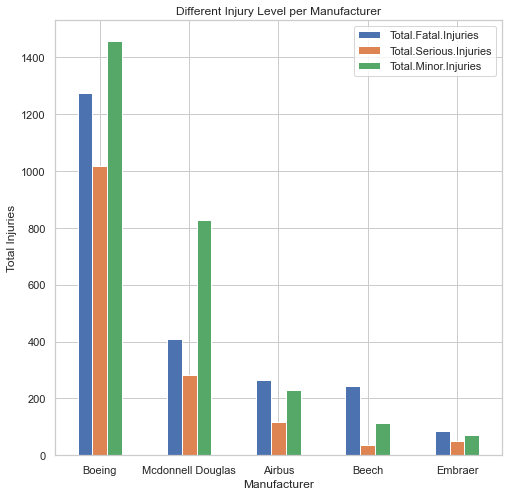

In [61]:
df_top_manufacturers.groupby('Manufacturer')[['Total.Fatal.Injuries', 
                                          'Total.Serious.Injuries', 
                                          'Total.Minor.Injuries']].sum().sort_values(by='Total.Fatal.Injuries', 
                                                                                     ascending=False).plot(kind='bar', 
                                                                                                           figsize=(8,8), 
                                                                                                           title='Different Injury Level per Manufacturer', 
                                                                                                           ylabel='Total Injuries', 
                                                                                                           rot=0);


Here, I notice that Beech, Airbus, and Embrear tend to have more fatal injuries than serious or mild. Boeing and Mcdonnell Douglas seem to have more minor injuries than fatalities. 

### Percentage fatal/serious injuries per incident.

In [14]:
manufacturer_injury_level = df_top_manufacturers[['Total.Passengers','Total.Fatal.Injuries', 
                    'Total.Serious.Injuries', 'Manufacturer']].groupby('Manufacturer').sum()

In [15]:
manufacturer_injury_level['Fatal and Serious Percentage'] = ((manufacturer_injury_level['Total.Fatal.Injuries'] 
                                                             + manufacturer_injury_level['Total.Serious.Injuries']) 
                                                             / manufacturer_injury_level['Total.Passengers']) * 100

In [16]:
manufacturer_injury_level.head()

,Total.Passengers,Total.Fatal.Injuries,Total.Serious.Injuries,Fatal and Serious Percentage
Manufacturer,,,,
Airbus,28521.0,266.0,117.0,1.342870
Beech,1909.0,243.0,35.0,14.562598
Boeing,135788.0,1275.0,1018.0,1.688662
Embraer,5676.0,87.0,49.0,2.396054
Mcdonnell Douglas,39662.0,408.0,282.0,1.739700


Here, we see that per accident, Beech has the highest percentage of fatalities or serious injuries at 14% (inversely, it has the smallest percentage of minor or no injuries at 85%). 

#### Let's visualize it: 

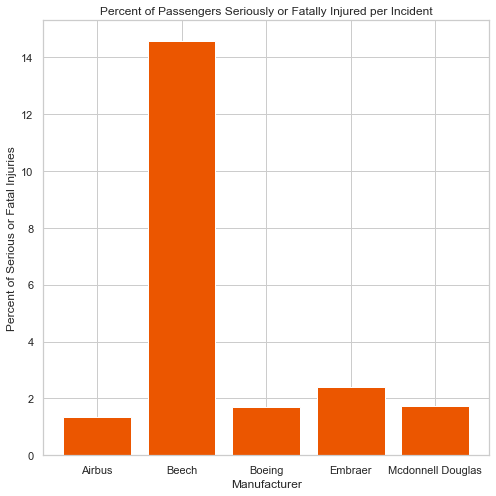

In [60]:
fatal_serious_list = manufacturer_injury_level['Fatal and Serious Percentage'].index.tolist()
fatal_serious_percent = manufacturer_injury_level['Fatal and Serious Percentage'].values.tolist()

fig, ax = plt.subplots(figsize=(8,8))
ax.bar(fatal_serious_list, fatal_serious_percent, color='#eb5600')
ax.set_xlabel('Manufacturer')
ax.set_ylabel('Percent of Serious or Fatal Injuries')
ax.set_title('Percent of Passengers Seriously or Fatally Injured per Incident');

In [18]:
# this is using the dataframe plots
# manufacturer_injury_level['Fatal and Serious Percentage'].plot(kind='bar', xlabel='Manufacturer', 
 #                                                              ylabel='Percent Seriously or Fatally Injured', 
 #                                                              title='Percent of Passengers Seriously or Fatally Injured per Accident',
 #                                                              figsize=(10,8), 
 #                                                             rot=70);

So we know we don't want a Beech plane. But these others look a little close. Let's look closer.

In [19]:
manufacturer_injury_level2 = manufacturer_injury_level.drop(index='Beech')

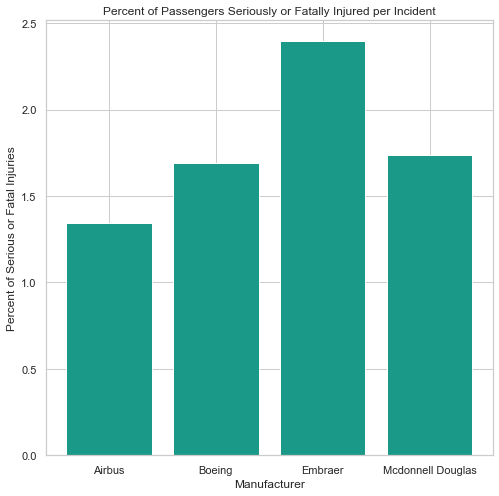

In [59]:
top_5_no_beech = manufacturer_injury_level2.index.tolist()
fatal_serious_percent_no_beech = manufacturer_injury_level2['Fatal and Serious Percentage'].values.tolist()

fig, ax = plt.subplots(figsize=(8,8))
ax.bar(top_5_no_beech, fatal_serious_percent_no_beech, color='#1a9988')
ax.set_xlabel('Manufacturer')
ax.set_ylabel('Percent of Serious or Fatal Injuries')
ax.set_title('Percent of Passengers Seriously or Fatally Injured per Incident');

Now we can see these levels a little clearer. According to this, Embraer has the highest chance of a serious or fatal injury, while Airbus has the lowest chance. 

In [21]:
# this is using the dataframe method to plot
#manufacturer_injury_level2['Fatal and Serious Percentage'].plot(kind='bar', xlabel='Manufacturer', 
#                                                               ylabel='Percent Seriously or Fatally Injured', 
#                                                               title='Percent of Passengers Seriously or Fatally Injured per Incident',
#                                                               figsize=(10,8), 
#                                                              rot=70);

Let's see if we can come up with an explanation as to why Beech has more severe injuries. Let's start with investigating the number of engines and engine type.

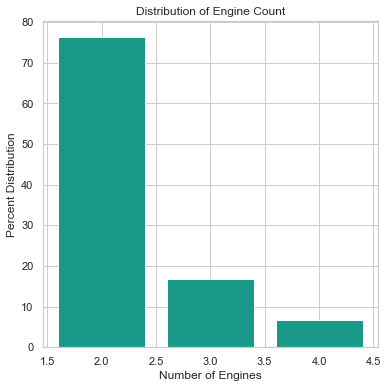

In [58]:
num_engines = df_top_manufacturers['Number.of.Engines'].value_counts().index.tolist()
num_engines_percent = (df_top_manufacturers['Number.of.Engines'].value_counts(normalize=True) * 100).values.tolist()

fig, ax = plt.subplots(figsize=(6,6))
ax.bar(num_engines, num_engines_percent, color='#1a9988')
ax.set_xlabel('Number of Engines')
ax.set_ylabel('Percent Distribution')
ax.set_title('Distribution of Engine Count');

The market is made up mainly of 2 engine planes. Let's see what kind of engines they are.

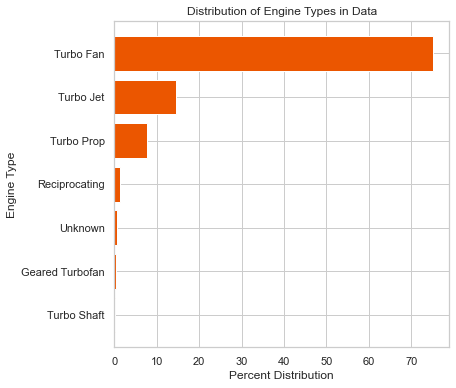

In [57]:
engine_list = df_top_manufacturers['Engine.Type'].value_counts().index.tolist()
engine_list_percent = (df_top_manufacturers['Engine.Type'].value_counts(normalize=True)*100).values.tolist()

fig, ax = plt.subplots(figsize=(6,6))
ax.barh(engine_list, engine_list_percent, color='#eb5600')
ax.set_ylabel('Engine Type')
ax.set_xlabel('Percent Distribution')
ax.set_title('Distribution of Engine Types in Data')
ax.invert_yaxis();

### Accident Severity by Manufacturer

Let's take a look at the distribution of aircraft damange per manufacturer. 

In [24]:
df_top_manufacturers['Aircraft.damage'].value_counts()

Undamaged      727
Minor          510
Substantial    333
Destroyed       57
Name: Aircraft.damage, dtype: int64

In [25]:
top_manufacturers = df_top_manufacturers['Manufacturer'].value_counts().index.tolist()

normalized_damage = {}

for i in top_manufacturers:
    normalized_damage[i] = df_top_manufacturers[df_top_manufacturers['Manufacturer']
                                                == i]['Aircraft.damage'].value_counts(normalize=True).to_dict()

normalized_damage

{'Boeing': {'Undamaged': 0.4914712153518124,
  'Minor': 0.31449893390191896,
  'Substantial': 0.17270788912579957,
  'Destroyed': 0.021321961620469083},
 'Mcdonnell Douglas': {'Undamaged': 0.3745704467353952,
  'Minor': 0.36769759450171824,
  'Substantial': 0.2268041237113402,
  'Destroyed': 0.030927835051546393},
 'Airbus': {'Undamaged': 0.5423728813559322,
  'Minor': 0.3107344632768362,
  'Substantial': 0.14124293785310735,
  'Destroyed': 0.005649717514124294},
 'Beech': {'Substantial': 0.43243243243243246,
  'Minor': 0.26126126126126126,
  'Destroyed': 0.1981981981981982,
  'Undamaged': 0.10810810810810811},
 'Embraer': {'Undamaged': 0.44545454545454544,
  'Substantial': 0.2909090909090909,
  'Minor': 0.21818181818181817,
  'Destroyed': 0.045454545454545456}}

In [26]:
manufacturer_damage_level = pd.DataFrame.from_dict(normalized_damage, orient = 'index')
manufacturer_damage_level

,Undamaged,Minor,Substantial,Destroyed
Boeing,0.491471,0.314499,0.172708,0.021322
Mcdonnell Douglas,0.374570,0.367698,0.226804,0.030928
Airbus,0.542373,0.310734,0.141243,0.005650
Beech,0.108108,0.261261,0.432432,0.198198
Embraer,0.445455,0.218182,0.290909,0.045455


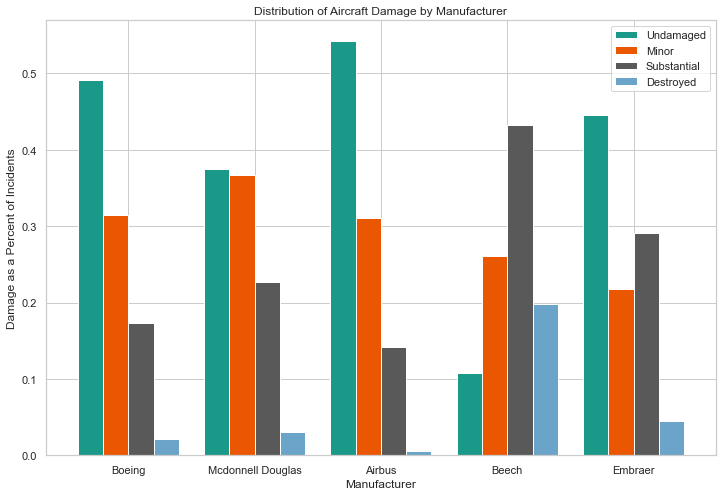

In [56]:
manufacturer_damage_level.plot(kind='bar', xlabel='Manufacturer', ylabel='Damage as a Percent of Incidents', 
                               title='Distribution of Aircraft Damage by Manufacturer', figsize=(12,8), rot=0,
                              width=0.8, color=['#1a9988', '#eb5600', '#595959', '#6aa4c8']);

In [ ]:
engine_list = df_top_manufacturers['Engine.Type'].value_counts().index.tolist()
engine_list_percent = (df_top_manufacturers['Engine.Type'].value_counts(normalize=True)*100).values.tolist()

fig, ax = plt.subplots(figsize=(6,6))
ax.barh(engine_list, engine_list_percent, color='#eb5600')
ax.set_ylabel('Engine Type')
ax.set_xlabel('Percent Distribution')
ax.set_title('Distribution of Engine Types in Data')
ax.invert_yaxis();

Based off this, we can see that Beech is once again an unsafe option. They have the lowest level of undamaged planes, more often there is some type of damage. 